<a href="https://colab.research.google.com/github/ErykCud/MLinFin2024/blob/main/Kopia_notatnika_simple_portfolio_strategy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

In [58]:
tickers = pd.read_html("https://en.wikipedia.org/wiki/Nasdaq-100")[4]
print(tickers.columns)
symbols = tickers.Ticker.to_list()
print(symbols[1:10])
df = yf.download(symbols, start = '2022-10-01')['Adj Close']
print(df.head())

Index(['Company', 'Ticker', 'GICS Sector', 'GICS Sub-Industry'], dtype='object')
['ADP', 'ABNB', 'GOOGL', 'GOOG', 'AMZN', 'AMD', 'AEP', 'AMGN', 'ADI']


[*********************100%%**********************]  101 of 101 completed


Ticker            AAPL        ABNB        ADBE         ADI         ADP  \
Date                                                                     
2022-10-03  141.052048  105.000000  285.239990  141.121704  224.695694   
2022-10-04  144.666229  110.809998  294.970001  146.683701  228.923538   
2022-10-05  144.963272  111.760002  297.380005  147.694992  231.274551   
2022-10-06  144.002792  111.580002  298.410004  146.800400  227.249863   
2022-10-07  138.715195  108.540001  288.769989  140.917480  219.732559   

Ticker            ADSK        AEP       AMAT        AMD        AMGN  ...  \
Date                                                                 ...   
2022-10-03  192.460007  82.226234  85.106102  66.110001  217.933365  ...   
2022-10-04  199.990005  84.490868  88.224205  67.900002  220.373322  ...   
2022-10-05  204.529999  81.732285  88.036720  67.940002  221.129898  ...   
2022-10-06  205.869995  78.759369  86.951309  67.849998  218.406235  ...   
2022-10-07  194.740005  7

In [4]:
df.dropna(axis = 1, inplace = True)
df = (df.pct_change()+1)[1:].resample("M").prod()
df.head()

Ticker,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,...,TTD,TTWO,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-31,1.076448,1.018191,1.116604,0.982705,1.040689,1.113478,0.996487,1.023652,0.908486,1.173190,...,0.870931,1.045166,1.012955,1.048578,1.048986,1.125501,1.087866,1.010178,0.993439,0.903759
2022-11-30,0.966973,0.955383,1.082983,1.205371,1.092842,0.942370,1.111336,1.244386,1.292541,1.066664,...,0.979339,0.892049,1.123451,1.004813,1.014103,1.150369,0.876923,1.077525,1.078482,0.865996
2022-12-31,0.877727,0.837086,0.975647,0.958410,0.908675,0.925328,0.980888,0.888504,0.834342,0.917039,...,0.859801,0.985240,0.915549,0.961932,0.912705,0.900241,0.831579,0.996605,1.005288,0.838516
2023-01-31,1.110521,1.299532,1.100467,1.045358,0.945365,1.151389,0.989574,1.144896,1.160259,0.961011,...,1.130939,1.087391,1.080214,1.030439,1.118845,0.986617,1.563291,1.084265,0.980887,1.109562
2023-02-28,1.023183,1.109531,0.874737,1.074963,0.973473,0.923452,0.944927,1.044237,1.045642,0.925923,...,1.103747,0.967500,0.967496,0.941251,0.898453,0.976674,1.053981,1.022268,0.938927,1.056298


In [5]:
def get_rtn(df, n):
  return df.rolling(n).apply(np.prod)

In [6]:
def get_top(date, df):
  r12 = get_rtn(df, 12)
  r6 = get_rtn(df, 6)
  r3 = get_rtn(df, 3)
  top50 = r12.loc[date].nlargest(50).index
  top30 = r6.loc[date, top50].nlargest(50).index
  top_10 = r3.loc[date, top30].nlargest(10).index
  return top_10

get_top('2023-02-28', df)

Index(['BKNG', 'ABNB', 'ANSS', 'CDNS', 'FTNT', 'IDXX', 'AVGO', 'ADI', 'CDW',
       'AMAT'],
      dtype='object', name='Ticker')

In [9]:
def get_random(date, df):
  r12 = get_rtn(df, 12)
  r6 = get_rtn(df, 6)
  r3 = get_rtn(df, 3)
  top10 = r12.loc[date].sample(10).index
  return top10

get_random('2023-02-28', df)

Index(['MRNA', 'WBA', 'AMZN', 'VRTX', 'LRCX', 'CRWD', 'ISRG', 'BKR', 'DLTR',
       'COST'],
      dtype='object', name='Ticker')

In [12]:
def portfolio_res(date, df):
  return np.mean(df.loc[date:,get_top(date,df)][1:2])

def portfolio_res_rand(date, df):
  return np.mean(df.loc[date:,get_random(date,df)][1:2])

[1.0960849169977123, 0.9103647260698697, 1.059291548174221, 0.9986297243612332, 1.0602341545421436, 0.9456465074922835, 1.0970836796910064, 1.0307919054065633, 1.0582687622408211, 0.9724185242445313, 0.9745108562283372, 0.9647028992510416, 1.1441994788459149, 1.0383775226970817, 1.0226694563993404, 1.103847073080836, 1.0368310688136244, 0.939283775368423, 1.0651732304384935]
[1.0388173072872124, 0.9224482213123911, 1.1123580821355248, 0.9784700837102032, 1.059909788832393, 0.9939199919946524, 1.0940533775315735, 1.0380896499382768, 1.050879900824646, 1.005165692979682, 0.9596752833774342, 0.9855643322430966, 1.110692178051414, 1.076600637095106, 1.0346877351441175, 1.0269313671819515, 0.9873926730473694, 0.9797376643352307, 1.0513223394287698]


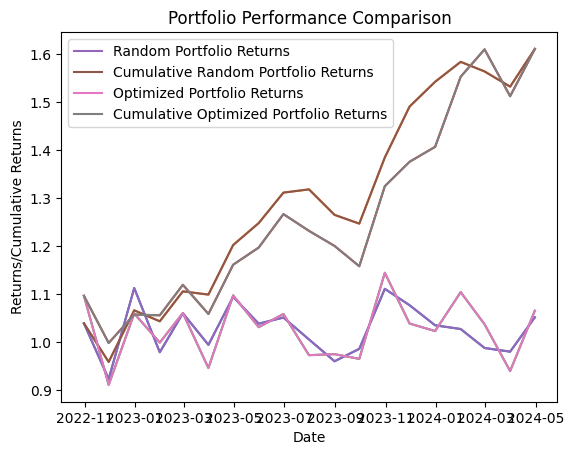

In [16]:
dates = df.index[:-1]
returns = []
for d in dates:
  returns.append(portfolio_res(d, df))

print(returns)
returns_rand = []
for d in dates:
  returns_rand.append(portfolio_res_rand(d, df))

print(returns_rand)

plt.plot(dates, returns_rand)
cum_returns_rand = pd.Series(returns_rand).cumprod()
plt.plot(dates, cum_returns_rand)
plt.plot(dates, returns)
cum_returns = pd.Series(returns).cumprod()
plt.plot(dates, cum_returns)
plt.plot(dates, returns_rand, label='Random Portfolio Returns')  # Label added
plt.plot(dates, cum_returns_rand, label='Cumulative Random Portfolio Returns') # Label added
plt.plot(dates, returns, label='Optimized Portfolio Returns') # Label added
plt.plot(dates, cum_returns, label='Cumulative Optimized Portfolio Returns') # Label added

plt.xlabel('Date')
plt.ylabel('Returns/Cumulative Returns')
plt.title('Portfolio Performance Comparison')
plt.legend()  # This displays the legend
plt.show()


In [23]:
w1 = [0.2,0.2,0.6]
w2 = [0.6,0.2,0.2]
w3 = [0.2,0.2,0.6]
Indexes = ['AMZN','VRTX','LRCX']


In [44]:
portfolio_res('2023-02-28',df)

1.0602341545421436

In [46]:

def portfolio_res_weights(date, weights):
  return np.sum(np.sum(weights * df.loc[date:,Indexes][1:2]))


In [31]:

w1* df.loc['2023-02-28':,Indexes][1:2]

Ticker,AMZN,VRTX,LRCX
Date,,,
2023-03-31,0.21923,0.217073,0.656831


In [32]:
df.loc['2023-02-28':,Indexes][1:2]

Ticker,AMZN,VRTX,LRCX
Date,,,
2023-03-31,1.096148,1.085363,1.094718


In [47]:
portfolio_res_weights('2023-02-28',w1)

1.0931330862447535

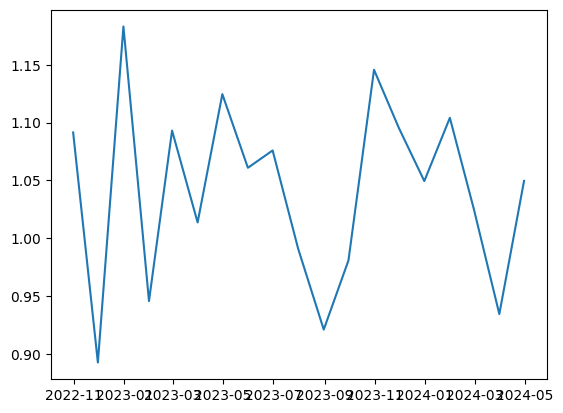

In [48]:
dates = df.index[:-1]
returns = []
for d in dates:
  returns.append(portfolio_res_weights(d, w1))

plt.plot(dates, returns)
cum_returns = pd.Series(returns).cumprod()

In [49]:
df

Ticker,AAPL,ABNB,ADBE,ADI,ADP,ADSK,AEP,AMAT,AMD,AMGN,...,TTD,TTWO,TXN,VRSK,VRTX,WBA,WBD,WDAY,XEL,ZS
Date,,,,,,,,,,,,,,,,,,,,,
2022-10-31,1.076448,1.018191,1.116604,0.982705,1.040689,1.113478,0.996487,1.023652,0.908486,1.173190,...,0.870931,1.045166,1.012955,1.048578,1.048986,1.125501,1.087866,1.010178,0.993439,0.903759
2022-11-30,0.966973,0.955383,1.082983,1.205371,1.092842,0.942370,1.111336,1.244386,1.292541,1.066664,...,0.979339,0.892049,1.123451,1.004813,1.014103,1.150369,0.876923,1.077525,1.078482,0.865996
2022-12-31,0.877727,0.837086,0.975647,0.958410,0.908675,0.925328,0.980888,0.888504,0.834342,0.917039,...,0.859801,0.985240,0.915549,0.961932,0.912705,0.900241,0.831579,0.996605,1.005288,0.838516
2023-01-31,1.110521,1.299532,1.100467,1.045358,0.945365,1.151389,0.989574,1.144896,1.160259,0.961011,...,1.130939,1.087391,1.080214,1.030439,1.118845,0.986617,1.563291,1.084265,0.980887,1.109562
2023-02-28,1.023183,1.109531,0.874737,1.074963,0.973473,0.923452,0.944927,1.044237,1.045642,0.925923,...,1.103747,0.967500,0.967496,0.941251,0.898453,0.976674,1.053981,1.022268,0.938927,1.056298
2023-03-31,1.118649,1.009085,1.189597,1.074944,1.018519,1.047662,1.034330,1.057512,1.247264,1.043555,...,1.088456,1.089000,1.084923,1.123378,1.085363,0.973262,0.966709,1.113603,1.052832,0.890812
2023-04-30,1.028987,0.961977,0.979734,0.912078,0.988187,0.935771,1.015716,0.920215,0.911846,0.991686,...,1.056313,1.041827,0.898877,1.011727,1.081442,1.019375,0.901324,0.901230,1.036625,0.771206
2023-05-31,1.046058,0.917272,1.106553,0.987825,0.949955,1.023615,0.907548,1.182372,1.322703,0.929056,...,1.089214,1.108134,1.047959,1.128793,0.949638,0.874664,0.828802,1.138874,0.933915,1.503663
2023-06-30,1.094330,1.167532,1.170420,1.101599,1.057785,1.026180,1.012993,1.084321,0.963624,1.006209,...,1.101884,1.068467,1.035312,1.033200,1.087585,0.938097,1.111702,1.065569,0.960122,1.079864


In [59]:
# Filtering dates between 2023-01-31 and 2023-12-31
df['Date'] = pd.to_datetime(df['Date'])
df_filtered = df.loc[(df['Date'] >= '2023-01-31') & (df['Date'] <= '2023-12-31')]

# Defining the indexes to filter out
indexes = ['AMZN', 'VRTX', 'LRCX']
df_filtered = df_filtered.loc[df_filtered['Ticker'].isin(indexes)].copy()

# Reshaping the data to have tickers as columns
df_pivot = df_filtered.pivot(index='Date', columns='Ticker', values=df.columns[2])

# Calculating RSI for each index
for ticker in indexes:
    df_pivot[f'{ticker}_RSI'] = ta.momentum.RSIIndicator(df_pivot[ticker]).rsi()

print(df_pivot)

KeyError: 'Date'

In [62]:
import yfinance as yf
import pandas as pd
import ta


indexes = ['AMZN', 'VRTX', 'LRCX']
start_date = '2023-01-31'
end_date = '2023-12-31'

data = yf.download(indexes, start=start_date, end=end_date)['Adj Close']

for ticker in indexes:
    data[f'{ticker}_RSI'] = ta.momentum.RSIIndicator(data[ticker]).rsi()

print(data)


ModuleNotFoundError: No module named 'ta'